---

## Inspiration for this Model
 I was in high school attending public school in downtown Chicago. I remember sometimes being afraid of civil unrest, especially surrounding high-profile court cases and during COVID-19. I remember experiencing teacher strikes, crazy winter storms, and other volatile activity, thinking: is it still safe to take the L blue line train to school today?

## What data will I use?
 I will use the GDELT database to identify violent events. Specifically, I will pull events with the code **145X** from the GDELT Event Database. We'll first visualize the data and then decide how to build our model.

---

--- 

Loading testing Data

In [1]:
# You might need to install these packages here
# %pip install keras
# %pip install tensorflow

import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

import matplotlib.pyplot as plt

In [2]:
# Load the test and train data
test_data = pd.read_csv('test_data.csv')
train_data = pd.read_csv('train_data.csv')

# Display the first few rows of each dataframe to verify
test_data.head()

,SQLDATE,Number of Events,Total AvgTone
0,2021-01-01,0,0.0
1,2021-01-02,0,0.0
2,2021-01-03,0,0.0
3,2021-01-04,0,0.0
4,2021-01-05,0,0.0


In [3]:
train_data.head()

,SQLDATE,Number of Events,Total AvgTone
0,2015-12-25,1,-12.850954
1,2015-12-26,0,0.000000
2,2015-12-27,0,0.000000
3,2015-12-28,0,0.000000
4,2015-12-29,0,0.000000


---

## Building the Model

The goal would be to take the last 7 days of data, and use it to predict the next day. I want to build a model that predicts the number of civil unrest events that will occur in the next 24 hrs.

Let's attempt the LSTM model.

---

--- 

Data formatting. We want a $\vec X$ of the historical data, and map it to $Y$, the output. 

It'll require some manipulation of the exisitng data.

---

In [4]:
test_X = []
test_Y = []
for i in range(30, len(test_data)):
    test_X.append(test_data.iloc[i-30:i][['Total AvgTone', 'Number of Events']].values)
    test_Y.append([test_data.iloc[i]['SQLDATE'], test_data.iloc[i]['Total AvgTone']])

train_X = []
train_Y = []
for i in range(30, len(train_data)):
    train_X.append(train_data.iloc[i-30:i][['Total AvgTone', 'Number of Events']].values)
    train_Y.append([train_data.iloc[i]['SQLDATE'], train_data.iloc[i]['Total AvgTone']])

# Convert lists to numpy arrays
test_X = np.array(test_X)
test_Y = np.array(test_Y)
train_X = np.array(train_X)
train_Y = np.array(train_Y)

In [5]:
test_X[0]

array([[ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [-0.95238095,  1.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,

In [6]:
test_Y[0]

array(['2021-01-31', '0.0'], dtype='<U32')

---

Building the LSTM Model

---

In [7]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(train_X, train_Y[:, 1].astype(float), epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100


/opt/anaconda3/envs/civil_unrest/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.3343 - val_loss: 38.2675
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9286 - val_loss: 38.0558
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6151 - val_loss: 38.1221
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7702 - val_loss: 38.1945
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8778 - val_loss: 38.4111
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0446 - val_loss: 38.4984
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2630 - val_loss: 38.7459
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7910 - val_loss: 38.7151
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1020 - val_loss: 38.9527
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4255 - val_loss: 38.9435
Epoch 11/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9157 - val_loss: 39.1897
Epoch 12/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.

---

Looking at the loss function

---

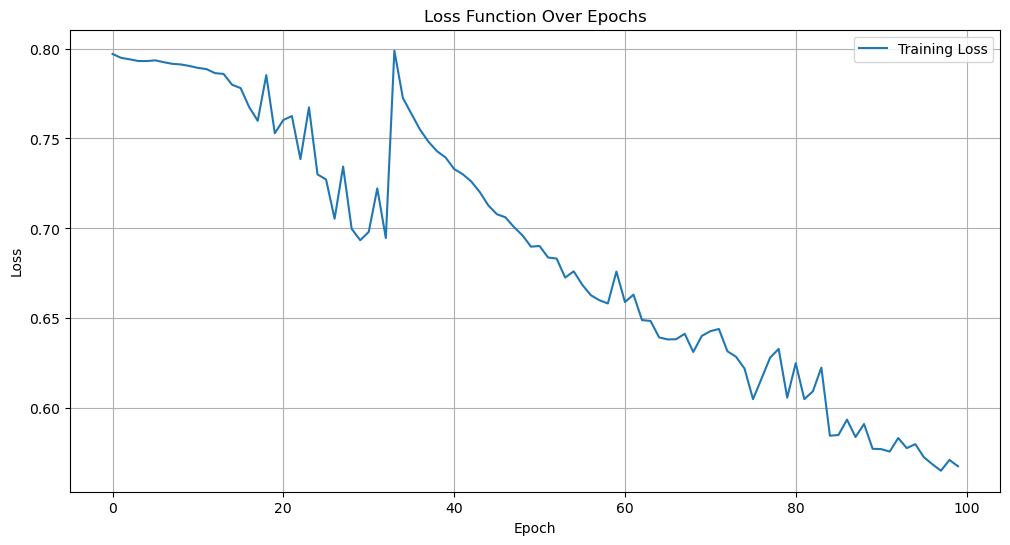

In [8]:
# Plot the loss function over the epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Loss Function Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

---

It's modestly concave. I'll want to keep an eye on this. 

---

---

## Predictions

Let's see how our model performed!

---

In [9]:
# Make predictions on the test data
predictions = model.predict(test_X)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


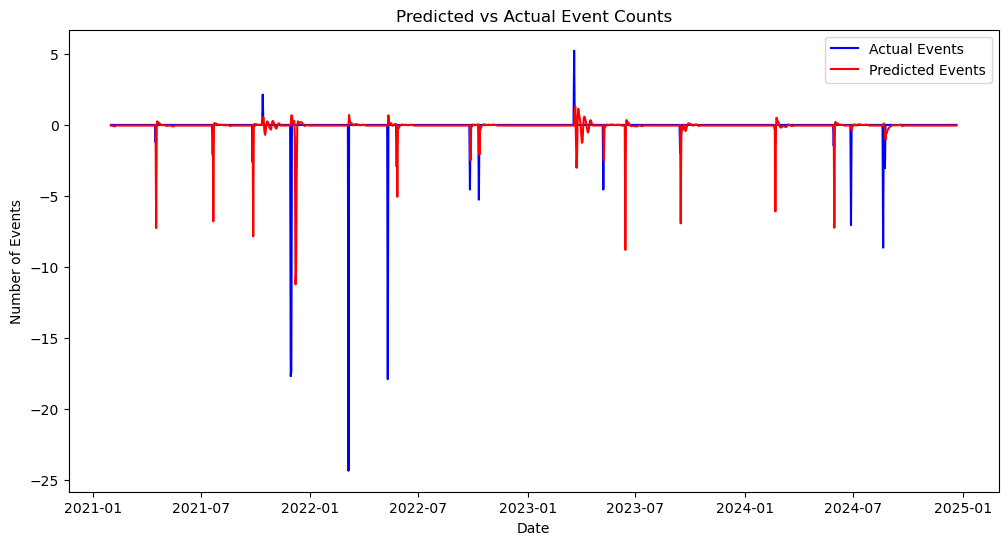

In [10]:
# Convert string dates to datetime
test_dates = pd.to_datetime(test_Y[:, 0])

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(test_dates, test_Y[:, 1].astype(float), label='Actual Events', color='blue')
plt.plot(test_dates, predictions, label='Predicted Events', color='red')
plt.title('Predicted vs Actual Event Counts')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend()

plt.show()

---

Let's make a prediction for tomorrow.

---

In [17]:
from cdf import cdf

print(f'I am predicting that on {test_dates[-1].date()}, the Total AvgTone will be {predictions[-1]}.')
print(f'This occures about {cdf(predictions[-1])} of the time.')

I am predicting that on 2024-12-21, the Total AvgTone will be [-0.04314746].
This occures about (array([-0.04314746], dtype=float32), array([1.])) of the time.


---

These results are not as telling as they use to be. 

I used to use all of Chicago 145X events as the features & labels, but then I felt that the labels were in-accurate. I then only pulled data nearby my commute, and now I have too small a data set to inform my risk tollerance for my commute.

Here's what I'm going to consider changing my model when I return:
* I'm going to let X include the lat & long
* I'm going to add all of Chicago to X

I believe this will predict Total AvgTone better.

---